In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import xarray as xr
from shapely.geometry import Polygon, Point

In [2]:
projection = '+proj=aea +lat_1=50 +lat_2=70 +lat_0=56 +lon_0=100 +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m +no_defs'

# transcultural empire

In [3]:
shape = gpd.read_file('data/1897RussianEmpire.shp')
shape.head()

,NAMERUS,NAMEENG,AREAV,POPALL,POPCITY,POPRUR,POPW,POPM,LANVRUS,LANLRUS,...,LANESKIMO,LANGILYAK,LANAIN,LANALEUT,LANENISEY_,LANJAPANES,LANARABIC,LANAYSORSK,LANOTHERS,geometry
0,Донского Войска область,Voyska Donskogo oblast,144191.6,2564238,318693,2245545,1269918,1294320,1712898,719655,...,0,0,0,0,0,0,0,0,0,"POLYGON ((43.22467 51.13092, 43.48828 50.98590..."
1,Тифлисская губерния,Tiflisskaya guberniya,39122.0,1051032,224796,826236,475585,575447,79082,6443,...,0,0,0,0,0,0,2,1570,31,"POLYGON ((45.71907 42.42147, 45.91048 42.31569..."
2,Орловская губерния,Orlovskaya guberniya,41057.7,2033798,244008,1789790,1050471,983327,2014127,4174,...,0,0,0,0,0,0,0,0,0,"POLYGON ((36.32221 53.28738, 36.32233 53.28729..."
3,Самарская губерния,Samarskaya guberniya,145845.9,2751336,158842,2592494,1399898,1351438,1775839,119301,...,0,0,0,0,0,0,1,0,0,"POLYGON ((53.52753 55.12769, 53.59549 55.05832..."
4,Нижегородская губерния,Nizhegorodskaya guberniya,45036.7,1584774,143031,1441743,840307,744467,1476391,253,...,0,0,0,0,0,0,0,1,0,"POLYGON ((45.34052 54.70270, 45.33209 54.69550..."


In [4]:
sakhalin = gpd.read_file('data/sakhalin.geojson')
shape.loc[82,'geometry'] = sakhalin.loc[0, 'geometry']

In [5]:
shape = shape.replace({
    'Ставропольская область': 'Ставропольская губерния',
    'Могилевская губерния' : 'Могилёвская губерния',
    'Елизаветопольская губерния' : 'Елизаветпольская губерния',
    'Иркутская область' : 'Иркутская губерния',
    'Ревельская губерния' : 'Эстляндская губерния',
    'Петербургская губерния' : 'Санкт-Петербургская губерния',
    'Донского Войска область' : 'Область войска Донского',
    'Сахалин остров' : 'Сахалин',
    'Сырь-Дарьинская область' : 'Сыр-Дарьинская область',
    'Абосская губерния' : 'Або-Бьёрнеборгская губерния'
})

In [6]:
shape = shape.replace({
    'Stravropolskaya oblast': 'Stravropolskaya guberniya',
    'Irkutskaya oblast' : 'Irkutskaya guberniya',
    'Peterburgskaya guberniya' : 'Sankt-Peterburgskaya guberniya',
    'Voyska Donskogo oblast' : 'Oblast Voyska Donskogo',
    'Abosskaya guberniya' : 'Abo-Bjorneborgskaya guberniya'
})

In [7]:
shape = shape.rename(columns={'NAMERUS': 'name', 'NAMEENG': 'name_eng', 'AREAV' : 'area'})

In [8]:
shape = shape.replace(-1, np.nan)

In [9]:
languages = shape[['name', 'LANVRUS', 'LANLRUS', 'LANBELORUS', 'LANPOLISH', 'LANJEWISH', 'LANGERMAN']] \
.rename(columns={'LANVRUS': 'russian', 
                 'LANLRUS': 'ukrainian', 
                 'LANBELORUS': 'belorus', 
                 'LANPOLISH': 'polish', 
                 'LANJEWISH': 'jewish',
                 'LANGERMAN': 'german',
                })
languages.loc[languages['name'] == 'Келецкая губерния', 'polish'] = 666772
languages.head()

,name,russian,ukrainian,belorus,polish,jewish,german
0,Область войска Донского,1712898.0,719655.0,9158.0,3316.0,15121.0,34855.0
1,Тифлисская губерния,79082.0,6443.0,247.0,6282.0,5188.0,8340.0
2,Орловская губерния,2014127.0,4174.0,2984.0,3422.0,6113.0,1406.0
3,Самарская губерния,1775839.0,119301.0,418.0,1940.0,1669.0,224336.0
4,Нижегородская губерния,1476391.0,253.0,995.0,1257.0,2493.0,912.0


In [10]:
geo = shape.iloc[:, np.r_[0:3, 143]]
geo.head()

,name,name_eng,area,geometry
0,Область войска Донского,Oblast Voyska Donskogo,144191.6,"POLYGON ((43.22467 51.13092, 43.48828 50.98590..."
1,Тифлисская губерния,Tiflisskaya guberniya,39122.0,"POLYGON ((45.71907 42.42147, 45.91048 42.31569..."
2,Орловская губерния,Orlovskaya guberniya,41057.7,"POLYGON ((36.32221 53.28738, 36.32233 53.28729..."
3,Самарская губерния,Samarskaya guberniya,145845.9,"POLYGON ((53.52753 55.12769, 53.59549 55.05832..."
4,Нижегородская губерния,Nizhegorodskaya guberniya,45036.7,"POLYGON ((45.34052 54.70270, 45.33209 54.69550..."


# cities

In [11]:
cities = pd.read_csv('data/cities.csv')
cities.head()

,name,capital_modern,lat,lon
0,Архангельская губерния,Arkhangelsk,64.5500,40.533300
1,Астраханская губерния,Astrakhan,46.3333,48.016700
2,Петроковская губерния,Piotrkow,51.4000,19.683333
3,Карсская область,Kars,40.6069,43.093100
4,Бакинская губерния,Baku,40.3667,49.835200


In [12]:
geometry = [Point(i) for i in zip(cities['lon'], cities['lat'])]
cities = gpd.GeoDataFrame(cities, geometry = geometry, crs = 4326)
cities.head()

,name,capital_modern,lat,lon,geometry
0,Архангельская губерния,Arkhangelsk,64.5500,40.533300,POINT (40.53330 64.55000)
1,Астраханская губерния,Astrakhan,46.3333,48.016700,POINT (48.01670 46.33330)
2,Петроковская губерния,Piotrkow,51.4000,19.683333,POINT (19.68333 51.40000)
3,Карсская область,Kars,40.6069,43.093100,POINT (43.09310 40.60690)
4,Бакинская губерния,Baku,40.3667,49.835200,POINT (49.83520 40.36670)


In [13]:
#ax = geo.to_crs(projection).plot(figsize=(15, 15), column = 'area', 
#                linewidth=0.5, edgecolor='black', cmap='Greens', missing_kwds = {"color": "lightgrey", "label": "Missing values"})
#cities.to_crs(projection).plot(ax=ax, color='black', markersize=10)

# ristat vars

In [14]:
ristat_replace = {
    'Або-Бьернеборгская губерния' : 'Або-Бьёрнеборгская губерния',
    'Земля войска Донского' : 'Область войска Донского',
    'Кутаисская  губерния вкл. Сухумский округ' : 'Кутаисская губерния',
    'Остров Сахалин' : 'Сахалин',
    'Сырдарьинская область' : 'Сыр-Дарьинская область',
    'Тифлисская губерния вкл. Закатальский округ' : 'Тифлисская губерния',
    'Могилевская губерния' : 'Могилёвская губерния',
    'Тургайская область ' : 'Тургайская область',
    'Елисаветпольская губерния' : 'Елизаветпольская губерния',
    'Карская губерния' : 'Карсская область'
}

## population

In [15]:
population = pd.read_excel('data/population.xlsx', header = 8)
population = population.drop(['Временной срез', 'Тема', 'Ед. изм', 'Counts'], axis=1).replace('нет данных', np.nan)
population

,Уровень 1,Уровень 2,Або-Бьернеборгская губерния,Акмолинская область,Амурская область,Архангельская губерния,Астраханская губерния,Бакинская губерния,Бессарабская губерния,Вазаская губерния,...,Уфимская губерния,Ферганская область,Харьковская губерния,Херсонская губерния,Черниговская губерния,Черноморская губерния,Эриванская губерния,Эстляндская губерния,Якутская область,Ярославская губерния
0,в городах,женщины,NaN,35369,12983,17193,64212,72481,142100,NaN,...,53483,126169,177148,372958,106932,7589,38182,37755,4311,70803
1,в городах,мужчины,NaN,39383,19851,16851,68290,97514,151232,NaN,...,53820,158189,190195,416002,102521,12052,54141,39326,4871,75507
2,в округах,женщины,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,в округах,мужчины,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,в постах и селах,женщины,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,в постах и селах,мужчины,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,в уездах,женщины,NaN,292277,39054,165559,425877,296170,802073,NaN,...,1053358,593126,1061409,959673,1072226,15113,349485,172552,125972,539955
7,в уездах,мужчины,NaN,315579,48418,146933,445163,360551,840007,NaN,...,1035981,694730,1063564,984979,1016175,22724,387748,163083,134726,385090
8,вне постов и сел,женщины,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,вне постов и сел,мужчины,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
population['urban'] = np.where(population['Уровень 1']=='в городах', 'urban', 'rural')
population = population.drop(['Уровень 1'], axis=1)
population.iloc[:, 1:102] = population.iloc[:, 1:102].astype(float)

In [17]:
population_t = population.groupby(['urban', 'Уровень 2']).sum(min_count=1).transpose().reset_index()
population_t.head()

urban                            index     rural              urban         
Уровень 2                                женщины   мужчины  женщины  мужчины
0          Або-Бьернеборгская губерния       NaN       NaN      NaN      NaN
1                  Акмолинская область  292277.0  315579.0  35369.0  39383.0
2                     Амурская область   39054.0   48418.0  12983.0  19851.0
3               Архангельская губерния  165559.0  146933.0  17193.0  16851.0
4                Астраханская губерния  425877.0  445163.0  64212.0  68290.0

In [18]:
population_t.columns = ['name', 'pop_rural_f', 'pop_rural_m', 'pop_urban_f', 'pop_urban_m']

In [19]:
population_t['pop_total'] = population_t.iloc[:, 1:5].sum(axis=1, min_count=1)
population_t['urbanization'] = (population_t['pop_urban_f'] + population_t['pop_urban_m']) / population_t['pop_total']
population_t.head()

,name,pop_rural_f,pop_rural_m,pop_urban_f,pop_urban_m,pop_total,urbanization
0,Або-Бьернеборгская губерния,NaN,NaN,NaN,NaN,NaN,NaN
1,Акмолинская область,292277.0,315579.0,35369.0,39383.0,682608.0,0.109509
2,Амурская область,39054.0,48418.0,12983.0,19851.0,120306.0,0.272921
3,Архангельская губерния,165559.0,146933.0,17193.0,16851.0,346536.0,0.098241
4,Астраханская губерния,425877.0,445163.0,64212.0,68290.0,1003542.0,0.132034


In [20]:
population_t = population_t.replace(ristat_replace)

## literacy

In [21]:
literacy = pd.read_excel('data/literacy.xlsx', header=8)
literacy = literacy.drop(['Временной срез', 'Тема', 'Ед. изм', 'Counts'], axis=1).replace('нет данных', np.nan)
literacy.head()

,Уровень 1,Уровень 2,Уровень 3,Або-Бьернеборгская губерния,Акмолинская область,Амурская область,Архангельская губерния,Астраханская губерния,Бакинская губерния,Бессарабская губерния,...,Уфимская губерния,Ферганская область,Харьковская губерния,Херсонская губерния,Черниговская губерния,Черноморская губерния,Эриванская губерния,Эстляндская губерния,Якутская область,Ярославская губерния
0,"грамотные, неучившиеся в высших и средних учеб...",женщины,в городах и станицах,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"грамотные, неучившиеся в высших и средних учеб...",женщины,в округах без станиц,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"грамотные, неучившиеся в высших и средних учеб...",женщины,в постах и селах,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"грамотные, неучившиеся в высших и средних учеб...",женщины,вне постов и сел,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"грамотные, неучившиеся в высших и средних учеб...",женщины,город,NaN,6527,2537,5819,14938,9143,26574,...,12374,2992,38347,102522,24170,2008,3882,28966,573,25353


In [22]:
check = (literacy['Уровень 3']=='город') | (literacy['Уровень 3']=='в городах и станицах')
literacy['urban'] = np.where(check, 'urban', 'rural')
literacy = literacy.loc[literacy['Уровень 1'] != 'неграмотные']
literacy = literacy.drop(['Уровень 1', 'Уровень 3'], axis=1)
literacy.iloc[:, 1:102] = literacy.iloc[:, 1:102].astype(float)

In [23]:
literacy_t = literacy.groupby(['urban', 'Уровень 2']).sum(min_count=1).transpose().reset_index()
literacy_t.columns = ['name', 'literate_rural_f', 'literate_rural_m', 'literate_urban_f', 'literate_urban_m']

In [24]:
literacy_t.iloc[61] = np.hstack((
    np.array('Псковская губерния'), 
    literacy_t.iloc[61, [3,4]].values, 
    literacy_t.iloc[61, [1,2]].values
))

In [25]:
literacy_t['literate_total'] = literacy_t.iloc[:, 1:4].sum(axis=1, min_count=1)
literacy_t.head()

,name,literate_rural_f,literate_rural_m,literate_urban_f,literate_urban_m,literate_total
0,Або-Бьернеборгская губерния,NaN,NaN,NaN,NaN,NaN
1,Акмолинская область,6604.0,38127.0,8778.0,17339.0,53509.0
2,Амурская область,2634.0,14288.0,3581.0,9377.0,20503.0
3,Архангельская губерния,14288.0,49011.0,7126.0,10586.0,70425.0
4,Астраханская губерния,18577.0,68886.0,17503.0,33652.0,104966.0


In [26]:
literacy_t = literacy_t.replace(ristat_replace)

In [27]:
pop_lit = pd.merge(population_t, literacy_t)

for i in ('rural_m', 'rural_f', 'urban_m', 'urban_f', 'total'):
    pop_lit[f'lit_rate_{i}'] = pop_lit[f'literate_{i}'] / pop_lit[f'pop_{i}']

lit_rate = pop_lit[['name'] + [f'lit_rate_{i}' 
                               for i in ('rural_m', 'rural_f', 'urban_m', 'urban_f', 'total')]]
lit_rate.head()

,name,lit_rate_rural_m,lit_rate_rural_f,lit_rate_urban_m,lit_rate_urban_f,lit_rate_total
0,Або-Бьёрнеборгская губерния,NaN,NaN,NaN,NaN,NaN
1,Акмолинская область,0.120816,0.022595,0.440266,0.248183,0.078389
2,Амурская область,0.295097,0.067445,0.472369,0.275822,0.170424
3,Архангельская губерния,0.333560,0.086302,0.628212,0.414471,0.203226
4,Астраханская губерния,0.154743,0.043621,0.492781,0.272581,0.104596


## r

In [28]:
births = pd.read_excel('data/births.xlsx', header=8)
births = births.drop(['Временной срез', 'Тема', 'Уровень 1',  'Ед. изм', 'Counts'], axis=1).replace('нет данных', np.nan).transpose().reset_index()
births.columns = ['name', 'births']
births.head()

,name,births
0,Або-Бьернеборгская губерния,NaN
1,Акмолинская область,23631.0
2,Амурская область,4856.0
3,Архангельская губерния,14759.0
4,Астраханская губерния,34294.0


In [29]:
deaths = pd.read_excel('data/deaths.xlsx', header=8)
deaths = deaths.drop(['Временной срез', 'Тема', 'Уровень 1',  'Ед. изм', 'Counts'], axis=1).replace('нет данных', np.nan).transpose().reset_index()
deaths.columns = ['name', 'deaths']
deaths.head()

,name,deaths
0,Або-Бьернеборгская губерния,NaN
1,Акмолинская область,15112.0
2,Амурская область,2393.0
3,Архангельская губерния,8506.0
4,Астраханская губерния,21379.0


In [30]:
births_deaths = pd.merge(births, deaths, on = 'name')
births_deaths = births_deaths.replace(ristat_replace)
r = pd.merge(births_deaths, population_t[['name', 'pop_total']])
r['pop_rate'] = (r['births'] - r['deaths']) / r['pop_total'] * 100
r.head()

,name,births,deaths,pop_total,pop_rate
0,Або-Бьёрнеборгская губерния,NaN,NaN,NaN,NaN
1,Акмолинская область,23631.0,15112.0,682608.0,1.248008
2,Амурская область,4856.0,2393.0,120306.0,2.047279
3,Архангельская губерния,14759.0,8506.0,346536.0,1.804430
4,Астраханская губерния,34294.0,21379.0,1003542.0,1.286942


## industry

In [31]:
industry = pd.read_excel('data/industry.xlsx', header=8)
industry = industry.loc[industry['Ед. изм'] == 'рубли'].iloc[:, 8:]
industry = industry.apply(pd.to_numeric, errors='coerce').sum(min_count=1).transpose().reset_index().replace(ristat_replace)
industry.columns = ['name', 'ind_output']
industry.head()

,name,ind_output
0,Або-Бьёрнеборгская губерния,NaN
1,Акмолинская область,971171.87
2,Амурская область,9431700.00
3,Архангельская губерния,9176000.00
4,Астраханская губерния,7042900.00


In [32]:
industry_pc = pd.merge(industry, population_t[['name', 'pop_total']])
industry_pc['industry_pc'] = industry_pc['ind_output'] / industry_pc['pop_total']
industry_pc.head()

,name,ind_output,pop_total,industry_pc
0,Або-Бьёрнеборгская губерния,NaN,NaN,NaN
1,Акмолинская область,971171.87,682608.0,1.422737
2,Амурская область,9431700.00,120306.0,78.397586
3,Архангельская губерния,9176000.00,346536.0,26.479211
4,Астраханская губерния,7042900.00,1003542.0,7.018042


## agriculture

In [33]:
agriculture = pd.read_excel('data/agriculture.xlsx', header=8)
check = (agriculture['Ед. изм'] == 'рубли') & (agriculture['Уровень 1'] == 'валовый доход')
agriculture = agriculture.loc[check, :].iloc[:, 5:]
agriculture = agriculture.apply(pd.to_numeric, errors='coerce').sum(min_count=1).transpose().reset_index().replace(ristat_replace)
agriculture.columns = ['name', 'agr_output']
agriculture.head()

,name,agr_output
0,Або-Бьёрнеборгская губерния,NaN
1,Акмолинская область,38704.0
2,Амурская область,NaN
3,Архангельская губерния,1774661.0
4,Астраханская губерния,22036.0


In [34]:
agriculture_pc = pd.merge(agriculture, population_t[['name', 'pop_total']])
agriculture_pc['agriculture_pc'] = agriculture_pc['agr_output'] / agriculture_pc['pop_total']
agriculture_pc.head()

,name,agr_output,pop_total,agriculture_pc
0,Або-Бьёрнеборгская губерния,NaN,NaN,NaN
1,Акмолинская область,38704.0,682608.0,0.056700
2,Амурская область,NaN,120306.0,NaN
3,Архангельская губерния,1774661.0,346536.0,5.121145
4,Астраханская губерния,22036.0,1003542.0,0.021958


# languages

In [35]:
languages['east_slavic'] = languages[['russian', 'ukrainian', 'belorus']].sum(1)
pop_lan = languages.merge(population_t[['name', 'pop_total']])
pop_lan
for i in ('russian', 'ukrainian', 'belorus', 'east_slavic', 'polish', 'jewish', 'german'):
    pop_lan[i] = pop_lan[i] / pop_lan['pop_total'] * 100


pop_lan.head()

,name,russian,ukrainian,belorus,polish,jewish,german,east_slavic,pop_total
0,Область войска Донского,66.799494,28.065063,0.357143,0.129317,0.589688,1.359273,95.221699,2564238.0
1,Тифлисская губерния,7.524224,0.613017,0.023501,0.597698,0.493610,0.793506,8.160741,1051032.0
2,Орловская губерния,99.032795,0.205232,0.146721,0.168257,0.300571,0.069132,99.384747,2033798.0
3,Самарская губерния,64.544607,4.336112,0.015193,0.070511,0.060661,8.153712,68.895911,2751336.0
4,Нижегородская губерния,93.160981,0.015964,0.062785,0.079317,0.157309,0.057548,93.239730,1584774.0


<AxesSubplot:>

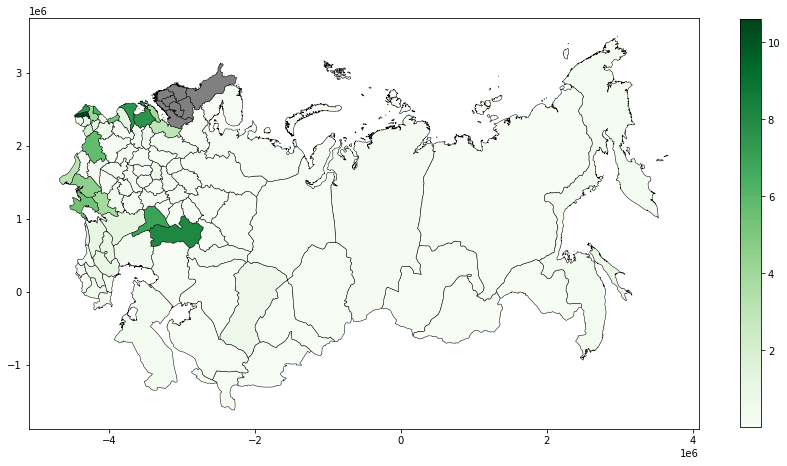

In [36]:
geo.merge(pop_lan).to_crs(projection).plot(
    figsize=(15, 15), 
    column='german',
    linewidth=0.5,
    legend=True,
    legend_kwds={'shrink': 0.5},
    edgecolor='black',
    cmap='Greens',
    missing_kwds={'color': 'grey', 'label': 'Missing values'}
)

# occupations

In [37]:
occupations_pc = pd.read_excel('data/occupations_edited.xlsx', sheet_name=1, header=9)
occupations_pc = occupations_pc.loc[
    ~occupations_pc['name'].isna(),
    ['name', 'Urban?', 'population', 'agriculture', 'manufacturing', 'mining', 'construction']]
occupations_pc = occupations_pc.pivot_table(
    index='name',
    columns='Urban?',
    values=['population', 'agriculture', 'manufacturing', 'mining', 'construction']
).reset_index()

c:\python39\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [38]:
occupations_pc.columns = [
    'name',
    'agriculture_rural', 'agriculture_urban', 
    'construction_rural', 'construction_urban', 
    'manufacturing_rural', 'manufacturing_urban',
    'mining_rural', 'mining_urban',
    'population_rural', 'population_urban'
]

In [39]:
occupations = occupations_pc.copy()
for i in ('agriculture', 'construction', 'manufacturing', 'mining'):
    for j in 'rural', 'urban':
        occupations[f'{i}_{j}'] = (occupations[f'{i}_{j}'] * occupations[f'population_{j}'] / 100).round()

In [40]:
for i in ('agriculture', 'construction', 'manufacturing', 'mining'):
    occupations[i] = occupations[f'{i}_urban'] + occupations[f'{i}_rural']
    occupations_pc[i] = (occupations[i] / (occupations['population_urban'] + occupations['population_rural'])).round(2)

In [41]:
occupations_pc['industry'] = occupations_pc[['manufacturing', 'mining']].sum(axis=1)

In [42]:
occupations_pc.head()

,name,agriculture_rural,agriculture_urban,construction_rural,construction_urban,manufacturing_rural,manufacturing_urban,mining_rural,mining_urban,population_rural,population_urban,agriculture,construction,manufacturing,mining,industry
0,Акмолинская область,87.70,16.54,1.04,6.48,2.25,14.15,0.05,0.18,682608.0,74752.0,0.81,0.02,0.03,0.00,0.03
1,Амурская область,58.16,3.92,4.49,12.59,5.75,15.39,6.31,4.64,120306.0,32834.0,0.47,0.06,0.08,0.06,0.14
2,Архангельская губерния,79.69,14.32,1.13,3.00,4.74,19.26,0.00,0.00,346536.0,34044.0,0.74,0.01,0.06,0.00,0.06
3,Астраханская губерния,73.70,12.51,1.60,7.17,5.06,18.14,0.13,0.05,1003542.0,135066.0,0.66,0.02,0.07,0.00,0.07
4,Бакинская губерния,67.98,3.36,2.04,6.66,6.96,22.06,1.00,0.64,8826716.0,169995.0,0.67,0.02,0.07,0.01,0.08


# climate

In [43]:
#climate = pd.DataFrame(geo['name'])
#for i in 'tmp', 'wet', 'pre', 'frs', 'vap':
#    cli_cru = xr.open_dataset(f'data/cru_ts4.05.1901.1910.{i}.dat.nc').mean('time')
#    cli = cli_cru.to_dataframe().drop('stn', 1).reset_index()
#    cli['geometry'] = [Point(i, j) for i, j in zip(cli.lon, cli.lat)]
#    cli = gpd.GeoDataFrame(cli, crs=4326)
#    climate[i] = geo['geometry'].map(lambda x: cli[cli.within(x)][i].mean())

In [44]:
#climate['wet'] = climate['wet'].map(lambda x: x.total_seconds() / (24 * 60 * 60))
#climate['frs'] = climate['frs'].map(lambda x: x.total_seconds() / (24 * 60 * 60))

In [45]:
#climate.to_csv('data/climate.csv')

In [46]:
climate = pd.read_csv('data/climate.csv')

# assemble regions

In [47]:
macroregions = pd.read_csv('data/macroregions.csv').loc[:, ['name', 'macroregion', 'sea']]
serfs = pd.read_csv('data/serfs.csv')
europe = pd.read_csv('data/data_europe.csv', encoding='windows-1251')
incomes = pd.read_excel('data/incomes_prices.xlsx', sheet_name=0)
prices = pd.read_excel('data/incomes_prices.xlsx', sheet_name=1)
prices['land_price'] = pd.to_numeric(prices['land_price'], errors='coerce')

In [48]:
def multi_merge(df, iterable):
    for tomerge in iterable:
        df = df.merge(tomerge, how='left')
    return df

In [49]:
variables = [
    population_t,
    macroregions,
    lit_rate,
    r.loc[:, ['name', 'pop_rate']],
    industry_pc.loc[:, ['name', 'industry_pc']],
    agriculture_pc.loc[:, ['name', 'agriculture_pc']],
    pop_lan.drop('pop_total', axis=1),
    occupations_pc[['name', 'agriculture', 'industry']],
    climate,
    serfs,
    europe,
    incomes,
    prices
]

regions = multi_merge(geo, variables)

In [50]:
regions.iloc[regions.index[regions['name'] == 'Выборгская губерния'][0], 4:] = np.nan

In [51]:
regions['density_total'] = regions['pop_total'] / regions['area']
regions['density_rural'] = ( regions['pop_rural_m'] + regions['pop_rural_f'] ) / regions['area']
regions.head()

,name,name_eng,area,geometry,pop_rural_f,pop_rural_m,pop_urban_f,pop_urban_m,pop_total,urbanization,...,frs,vap,sh_serfs1858,lnrail,grain_prod,grain_harvest,peasant_inc,land_price,density_total,density_rural
0,Область войска Донского,Oblast Voyska Donskogo,144191.6,"POLYGON ((43.22467 51.13092, 43.48828 50.98590...",1114296.0,1131249.0,155622.0,163071.0,2564238.0,0.124284,...,11.976029,8.521584,0.478631,7.083044,5.950960,30936409.19,460.604939,84.0,17.783546,15.573341
1,Тифлисская губерния,Tiflisskaya guberniya,39122.0,"POLYGON ((45.71907 42.42147, 45.91048 42.31569...",382972.0,443264.0,92613.0,132183.0,1051032.0,0.213881,...,13.718115,7.297501,0.252437,NaN,NaN,NaN,NaN,NaN,26.865498,21.119472
2,Орловская губерния,Orlovskaya guberniya,41057.7,"POLYGON ((36.32221 53.28738, 36.32233 53.28729...",932303.0,857487.0,118168.0,125840.0,2033798.0,0.119977,...,14.192109,7.953364,0.155594,7.049411,3.970622,17428351.48,481.771932,122.0,49.535118,43.592067
3,Самарская губерния,Samarskaya guberniya,145845.9,"POLYGON ((53.52753 55.12769, 53.59549 55.05832...",1320738.0,1271756.0,79160.0,79682.0,2751336.0,0.057733,...,15.125916,7.068265,0.017088,7.071319,4.476013,30749357.09,401.066725,50.0,18.864678,17.775570
4,Нижегородская губерния,Nizhegorodskaya guberniya,45036.7,"POLYGON ((45.34052 54.70270, 45.33209 54.69550...",771062.0,670681.0,69245.0,73786.0,1584774.0,0.090253,...,15.228991,7.162173,0.609501,4.060443,3.542438,12739406.53,477.119928,49.0,35.188502,32.012625


In [52]:
migrations = pd.read_excel('data/migrations.xlsx')
# migrations_same = pd.read_excel('data/migrations_same.xlsx')
# migrations = migrations.append(migrations_same)

In [53]:
migrations['mig_total'] = migrations.iloc[:, 2:6].sum(axis=1)
migrations['mig_rural'] = migrations['rural_m'] + migrations['rural_f']
migrations['mig_urban'] = migrations['urban_m'] + migrations['urban_f']
migrations.head()

,name_i,name_j,rural_m,rural_f,urban_m,urban_f,mig_total,mig_rural,mig_urban
0,Астраханская губерния,Архангельская губерния,10,0,7,3,20,10,10
1,Бессарабская губерния,Архангельская губерния,3,4,6,6,19,7,12
2,Виленская губерния,Архангельская губерния,11,1,145,25,182,12,170
3,Витебская губерния,Архангельская губерния,24,9,141,12,186,33,153
4,Владимирская губерния,Архангельская губерния,67,30,59,35,191,97,94


In [54]:
for k in ('i', 'j'):
    d = {'i':'from', 'j':'to'}
    data_mig = migrations.groupby(f'name_{k}').agg({'mig_total' : 'sum', 'mig_rural' : 'sum', 'mig_urban' : 'sum'}).rename(columns={'mig_total':f'mig_{d[k]}','mig_rural':f'mig_rural_{d[k]}','mig_urban':f'mig_urban_{d[k]}'}).reset_index()
    regions = regions.merge(data_mig, how='left', left_on=['name'], right_on=[f'name_{k}']).drop(f'name_{k}', axis=1)
    regions[f'mig_of_pop_{d[k]}'] = regions[f'mig_{d[k]}'] / regions['pop_total']
    
regions['mig_net_rate'] = (regions['mig_to'] - regions['mig_from']) / regions['pop_total']

In [55]:
regions.to_file('data/regions.geojson', driver='GeoJSON')
regions.head()

,name,name_eng,area,geometry,pop_rural_f,pop_rural_m,pop_urban_f,pop_urban_m,pop_total,urbanization,...,density_rural,mig_from,mig_rural_from,mig_urban_from,mig_of_pop_from,mig_to,mig_rural_to,mig_urban_to,mig_of_pop_to,mig_net_rate
0,Область войска Донского,Oblast Voyska Donskogo,144191.6,"POLYGON ((43.22467 51.13092, 43.48828 50.98590...",1114296.0,1131249.0,155622.0,163071.0,2564238.0,0.124284,...,15.573341,137028.0,82452.0,54576.0,0.053438,421288.0,304280.0,117008.0,0.164294,0.110856
1,Тифлисская губерния,Tiflisskaya guberniya,39122.0,"POLYGON ((45.71907 42.42147, 45.91048 42.31569...",382972.0,443264.0,92613.0,132183.0,1051032.0,0.213881,...,21.119472,44060.0,20453.0,23607.0,0.041921,100721.0,38317.0,62404.0,0.095831,0.053910
2,Орловская губерния,Orlovskaya guberniya,41057.7,"POLYGON ((36.32221 53.28738, 36.32233 53.28729...",932303.0,857487.0,118168.0,125840.0,2033798.0,0.119977,...,43.592067,298140.0,188680.0,109460.0,0.146593,87597.0,49031.0,38566.0,0.043071,-0.103522
3,Самарская губерния,Samarskaya guberniya,145845.9,"POLYGON ((53.52753 55.12769, 53.59549 55.05832...",1320738.0,1271756.0,79160.0,79682.0,2751336.0,0.057733,...,17.775570,235606.0,153982.0,81624.0,0.085633,240932.0,196178.0,44754.0,0.087569,0.001936
4,Нижегородская губерния,Nizhegorodskaya guberniya,45036.7,"POLYGON ((45.34052 54.70270, 45.33209 54.69550...",771062.0,670681.0,69245.0,73786.0,1584774.0,0.090253,...,32.012625,133195.0,66461.0,66734.0,0.084047,77782.0,47797.0,29985.0,0.049081,-0.034966


# assemble interactions

## join vars

In [56]:
def join_var(df, var_df):
    for k in 'i', 'j':
        var_df_k = var_df.add_suffix(f'_{k}')
        df = pd.merge(df, var_df_k, on=f'name_{k}')
    return df

def join_vars(df, vars_df_list):
    for var_df in vars_df_list:
        df = join_var(df, var_df)
    return df

In [57]:
suffixes = ('total', 'urban_m', 'urban_f', 'rural_m', 'rural_f')
pop = regions[['name']+[f'pop_{i}' for i in suffixes]]
lit = regions[['name']+[f'lit_rate_{i}' for i in suffixes]]
other = regions[['name', 'macroregion', 'sea', 'urbanization', 'pop_rate', 'industry_pc', 'agriculture_pc',
                'agriculture', 'industry', 'density_total', 'density_rural', 
                 'tmp', 'wet', 'pre', 'frs', 'vap', 
                 'sh_serfs1858', 'lnrail', 'grain_prod', 'grain_harvest', 'land_price', 'peasant_inc']]

migrations = join_vars(migrations, [pop, lit, other, pop_lan.drop('pop_total', 1)])

In [58]:
eastsouth = join_var(migrations, cities)
migrations['east'] = (eastsouth['lon_j'] > eastsouth['lon_i']).astype(int)
migrations['south'] = (eastsouth['lat_j'] < eastsouth['lat_i']).astype(int)

In [59]:
migrations['borders'] = 0
for i, j in zip(migrations.name_i, migrations.name_j):
    poly_i = regions.loc[regions['name']==i, 'geometry'].values[0]
    poly_j = regions.loc[regions['name']==j, 'geometry'].values[0]

    b = poly_i.buffer(0.1).intersects(poly_j)

    migrations.loc[(migrations['name_i']==i) & (migrations['name_j']==j), 'borders'] = int(b)

## dist

In [60]:
def join_dist(df, dist_df, how='centroids'):
    dist_temp = join_var(df, dist_df)
    if how=='centroids':
        c_i = gpd.GeoSeries(dist_temp['geometry_i']).to_crs(projection).centroid
        c_j = gpd.GeoSeries(dist_temp['geometry_j']).to_crs(projection).centroid
    elif how=='capitals':
        c_i = gpd.GeoSeries(dist_temp['geometry_i']).to_crs(projection)
        c_j = gpd.GeoSeries(dist_temp['geometry_j']).to_crs(projection)
    else:
        raise ValueError        
    df[f'distance_{how}'] = c_i.distance(c_j) / 1000
    return df

In [61]:
migrations = join_dist(migrations, cities, how='capitals')
migrations = join_dist(migrations, regions[['name', 'geometry']], how='centroids')

In [62]:
migrations.to_csv('data/interactions.csv', index = False)
migrations.head()

,name_i,name_j,rural_m,rural_f,urban_m,urban_f,mig_total,mig_rural,mig_urban,pop_total_i,...,belorus_j,polish_j,jewish_j,german_j,east_slavic_j,east,south,borders,distance_capitals,distance_centroids
0,Астраханская губерния,Архангельская губерния,10,0,7,3,20,10,10,1003542.0,...,0.073874,0.131588,0.073008,0.089168,85.177875,0,0,0,2093.617468,2247.587377
1,Бессарабская губерния,Архангельская губерния,3,4,6,6,19,7,12,1935412.0,...,0.073874,0.131588,0.073008,0.089168,85.177875,1,0,0,2089.805591,2555.709160
2,Виленская губерния,Архангельская губерния,11,1,145,25,182,12,170,1591207.0,...,0.073874,0.131588,0.073008,0.089168,85.177875,1,0,0,1393.490293,1822.196625
3,Витебская губерния,Архангельская губерния,24,9,141,12,186,33,153,1489246.0,...,0.073874,0.131588,0.073008,0.089168,85.177875,1,0,0,1197.999682,1606.159442
4,Владимирская губерния,Архангельская губерния,67,30,59,35,191,97,94,1515691.0,...,0.073874,0.131588,0.073008,0.089168,85.177875,1,0,0,951.244669,1322.618189
